In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
DATA_PATH='/home/yifei/Documents/Deep-Learning-For-Medication-Recognition/Pills Images'
medication_array=['Pill1','Pill2','Pill3','Pill4','Pill5','Pill6']
colour_array=['Red','Orange','White','Black','Dark Red','Blue']
shape=['Circular','Elliptical']
IMG_SIZE=500
x_train=[]

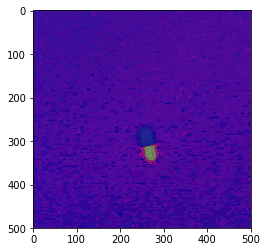

In [17]:
def create_training_data():
    for pill in medication_array:
        my_path=os.path.join(DATA_PATH,pill)
        classnum=medication_array.index(pill)+1 #gives you the index at that category (1 to 6)
        pill_shape=shape[1]
        if classnum==1 or classnum==2 or classnum==4:
            pill_shape=shape[0]
        for image in os.listdir(my_path):
            try:
                img_array=cv2.imread(os.path.join(my_path,image))
                new_array=process_image(img_array,IMG_SIZE) 
                #crop the pill, differentitate it from the blister packaging
                x_train.append([new_array,classnum,pill_shape,colour_array[classnum-1]])
            except Exception as e:
                print('f')
                pass #accounts for corrupted images

create_training_data()

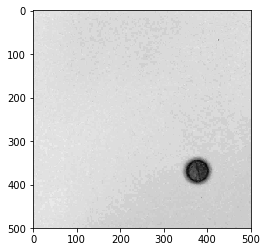

In [18]:
plt.imshow(x_train[300][0],cmap='Greys_r')

array([[[ 56,  14, 145],
        [ 56,  14, 146],
        [ 56,  14, 147],
        ...,
        [ 50,   5, 143],
        [ 50,   5, 143],
        [ 50,   5, 143]],

       [[ 56,  14, 145],
        [ 56,  14, 146],
        [ 56,  14, 147],
        ...,
        [ 50,   5, 143],
        [ 50,   5, 143],
        [ 50,   5, 143]],

       [[ 56,  14, 146],
        [ 56,  14, 146],
        [ 56,  14, 146],
        ...,
        [ 50,   5, 143],
        [ 50,   5, 143],
        [ 50,   5, 143]],

       ...,

       [[  0,   0, 144],
        [120,   4, 145],
        [120,   4, 145],
        ...,
        [ 20,   5, 140],
        [ 20,   5, 140],
        [ 23,   7, 140]],

       [[  0,   0, 143],
        [  0,   0, 143],
        [120,   4, 145],
        ...,
        [ 20,   5, 140],
        [ 20,   5, 140],
        [ 23,   7, 140]],

       [[ 30,   4, 143],
        [  0,   0, 143],
        [  0,   0, 143],
        ...,
        [ 20,   5, 140],
        [ 20,   5, 140],
        [ 23,   7, 140]]

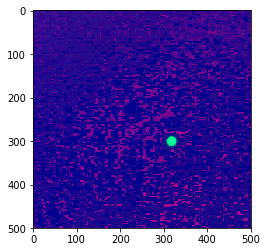

In [15]:
data_path1='/home/yifei/Documents/Deep-Learning-For-Medication-Recognition/Pills Images/Pill1/WIN_20181221_17_30_36_Pro.jpg' 
img_array=cv2.imread(data_path1)
new_array=cv2.resize(img_array,(1000,1000))
def process_image(img_array,IMG_SIZE):
    crop_img = img_array[500:1500, 1000:2000] #first crop the image
    #next find the contours of the image
    new_array=cv2.resize(crop_img,(IMG_SIZE,IMG_SIZE)) #resize every image before passing it in
    hsv = cv2.cvtColor(new_array, cv2.COLOR_BGR2HSV) #convert image to hsv
   # ret, thresh = cv2.threshold(hsv, 127, 255, 0) #threshold our hsv
    
    #im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(img, contours, -1, (0,255,0), 3)
    plt.imshow(hsv,cmap='Greys_r')
    #plt.show()    
    return hsv
process_image(img_array,500)


In [16]:
def process_image(img_array,IMG_SIZE):
    crop_img = img_array[500:1500, 1000:2000] #first crop the image
    #next find the contours of the image
    new_array=cv2.resize(crop_img,(IMG_SIZE,IMG_SIZE)) #resize every image before passing it in
    hsv = cv2.cvtColor(new_array, cv2.COLOR_BGR2HSV) #convert image to hsv
   # ret, thresh = cv2.threshold(hsv, 127, 255, 0) #threshold our hsv
    
    #im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(img, contours, -1, (0,255,0), 3)
    plt.imshow(hsv,cmap='Greys_r')
    #plt.show()    
    return hsv

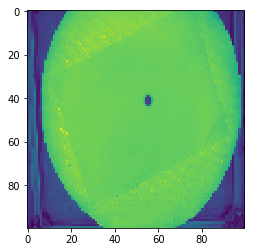

In [35]:
import random
import pickle
random.shuffle(x_train) #shuffle training data so it trains evenly
x=[]
y=[]
shapes=[]
colours=[]


#create an array of images and an array of labels
for images, labels, shape, colours in x_train:
    x.append(images)
    y.append(labels)
    shapes.append()

plt.imshow(x[0])
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [20]:
print(x_train[0])

[array([[22, 46, 15, ..., 40, 42, 27],
       [29, 43, 20, ..., 40, 43, 27],
       [34, 42, 21, ..., 40, 45, 26],
       ...,
       [31, 26, 12, ..., 23, 26, 15],
       [25, 24,  7, ..., 21, 26, 14],
       [24, 22, 13, ..., 24, 21,  9]], dtype=uint8), 5]
